In [367]:
import pandas as pd
import numpy as np
from global_values import *
import matplotlib.pyplot as plt

# Aids

In [314]:
df = pd.read_csv('../bases/bases_usadas/aids.csv')
df.columns

Index(['DT_NOTIFIC', 'CS_SEXO', 'NU_IDADE_N', 'CS_RACA', 'SG_UF_NOT'], dtype='object')

In [315]:
df.rename(columns={
    'DT_NOTIFIC': 'data',
    'CS_SEXO': 'sexo',
    'NU_IDADE_N': 'idade',
    'CS_RACA': 'raca',
    'SG_UF_NOT': 'estado'
}, inplace=True)

df.columns

Index(['data', 'sexo', 'idade', 'raca', 'estado'], dtype='object')

In [316]:
df['raca'].unique()

array([nan,  4.,  9.,  1.,  2.,  3.,  5.])

In [317]:
df['raca'] = df['raca'].fillna(0).replace(9, 0)
df['raca'].unique()

array([0., 4., 1., 2., 3., 5.])

In [318]:
num_invalid_dates = df[df['data'].str.match(r'^\*+$')].shape[0]
print(f"Number of rows with only '*' in the 'data' column: {num_invalid_dates}")

Number of rows with only '*' in the 'data' column: 221514


In [319]:
# Not considering the rows with only '*' in the 'data' column

df = df[~df['data'].str.match(r'^\*+$')]

In [320]:
df.head()

,data,sexo,idade,raca,estado
29,20070102,F,4039,4.0,NaN
80,20070104,M,4045,0.0,NaN
108,20070104,F,4041,4.0,NaN
129,20070106,M,4026,4.0,NaN
170,20070108,M,4038,1.0,NaN


In [321]:
# Check if all dates follow the yyyymmdd format
valid_dates = df['data'].str.match(r'^\d{8}$')
all_valid = valid_dates.all()

print(f"All dates follow the yyyymmdd format: {all_valid}")

All dates follow the yyyymmdd format: True


In [322]:
df['estado'].unique()

array([nan, 35., 31., 15., 33., 43., 41., 11., 26., 42., 13., 52., 17.,
       53., 23., 28., 27., 21., 50., 16., 29., 24., 22., 51., 32., 12.,
       14., 25.])

In [323]:
df['estado'] = df['estado'].fillna(0)
df['estado'].unique()

array([ 0., 35., 31., 15., 33., 43., 41., 11., 26., 42., 13., 52., 17.,
       53., 23., 28., 27., 21., 50., 16., 29., 24., 22., 51., 32., 12.,
       14., 25.])

In [324]:
df.head()

,data,sexo,idade,raca,estado
29,20070102,F,4039,4.0,0.0
80,20070104,M,4045,0.0,0.0
108,20070104,F,4041,4.0,0.0
129,20070106,M,4026,4.0,0.0
170,20070108,M,4038,1.0,0.0


In [325]:
df["idade"].unique()

array(['4039', '4045', '4041', '4026', '4038', '4032', '4053', '4043',
       '4030', '4049', '4040', '4033', '4037', '4073', '4036', '4034',
       '4024', '4025', '4044', '4068', '4052', '4028', '4048', '4047',
       '4029', '4050', '4031', '4084', '4027', '4057', '4061', '4046',
       '4042', '4051', '4022', '4059', '4064', '4035', '4065', '4056',
       '4069', '4055', '4021', '4063', '4023', '4017', '4075', '4072',
       '4058', '4018', '4019', '4070', '4054', '4016', '4067', '4020',
       '4062', '4060', '4013', '4085', '4077', '4074', '4071', '4076',
       '4014', '4015', '4082', '4066', '4078', '4080', '4083', '4079',
       '4094', '4123', '4087', '4093', '4081', '4086', '4088', '4091',
       '4109', '4090', '4089', '4105', '4100', '4095', '4102', '4099',
       '4092', '4107', '4103', '4115', '4104', '4096', '4097', '4113',
       '4098', '4101', '4112'], dtype=object)

In [326]:
df['idade'] = df['idade'].str.slice(start=1)
df['idade'].unique()

array(['039', '045', '041', '026', '038', '032', '053', '043', '030',
       '049', '040', '033', '037', '073', '036', '034', '024', '025',
       '044', '068', '052', '028', '048', '047', '029', '050', '031',
       '084', '027', '057', '061', '046', '042', '051', '022', '059',
       '064', '035', '065', '056', '069', '055', '021', '063', '023',
       '017', '075', '072', '058', '018', '019', '070', '054', '016',
       '067', '020', '062', '060', '013', '085', '077', '074', '071',
       '076', '014', '015', '082', '066', '078', '080', '083', '079',
       '094', '123', '087', '093', '081', '086', '088', '091', '109',
       '090', '089', '105', '100', '095', '102', '099', '092', '107',
       '103', '115', '104', '096', '097', '113', '098', '101', '112'],
      dtype=object)

In [327]:
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')
df['idade'].unique()

array([ 39,  45,  41,  26,  38,  32,  53,  43,  30,  49,  40,  33,  37,
        73,  36,  34,  24,  25,  44,  68,  52,  28,  48,  47,  29,  50,
        31,  84,  27,  57,  61,  46,  42,  51,  22,  59,  64,  35,  65,
        56,  69,  55,  21,  63,  23,  17,  75,  72,  58,  18,  19,  70,
        54,  16,  67,  20,  62,  60,  13,  85,  77,  74,  71,  76,  14,
        15,  82,  66,  78,  80,  83,  79,  94, 123,  87,  93,  81,  86,
        88,  91, 109,  90,  89, 105, 100,  95, 102,  99,  92, 107, 103,
       115, 104,  96,  97, 113,  98, 101, 112])

In [328]:
df.head()

,data,sexo,idade,raca,estado
29,20070102,F,39,4.0,0.0
80,20070104,M,45,0.0,0.0
108,20070104,F,41,4.0,0.0
129,20070106,M,26,4.0,0.0
170,20070108,M,38,1.0,0.0


In [329]:
df['sexo'].unique()

array(['F', 'M', nan], dtype=object)

In [330]:
df['sexo'] = df['sexo'].fillna('0').replace({'M': '1', 'F': '2'})
df['sexo'].unique()

array(['2', '1', '0'], dtype=object)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419624 entries, 29 to 641137
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   data    419624 non-null  object 
 1   sexo    419624 non-null  object 
 2   idade   419624 non-null  int64  
 3   raca    419624 non-null  float64
 4   estado  419624 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.2+ MB


In [332]:
df['estado'] = df['estado'].astype(int)
df['raca'] = df['raca'].astype(int)
df.dtypes

data      object
sexo      object
idade      int64
raca       int64
estado     int64
dtype: object

In [333]:
df['data'] = pd.to_datetime(df['data'], format='%Y%m%d')
df.set_index('data', inplace=True)
df.head()

,sexo,idade,raca,estado
data,,,,
2007-01-02,2,39,4,0
2007-01-04,1,45,0,0
2007-01-04,2,41,4,0
2007-01-06,1,26,4,0
2007-01-08,1,38,1,0


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 419624 entries, 2007-01-02 to 2023-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   sexo    419624 non-null  object
 1   idade   419624 non-null  int64 
 2   raca    419624 non-null  int64 
 3   estado  419624 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 16.0+ MB


In [335]:
df.to_parquet('AIDS.parquet')

# Dengue

In [336]:
df1 = pd.read_csv('../bases/bases_usadas/deng1.csv')
df1.columns

C:\Users\angel\AppData\Local\Temp\ipykernel_27104\1084313326.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../bases/bases_usadas/deng1.csv')


Index(['CS_SEXO', 'CS_RACA', 'DT_NOTIFIC', 'SG_UF_NOT', 'NU_IDADE_N'], dtype='object')

In [337]:
df1.rename(columns={
    'CS_SEXO': 'sexo',
    'CS_RACA': 'raca',
    'DT_NOTIFIC': 'data',
    'SG_UF_NOT': 'estado',
    'NU_IDADE_N': 'idade'
}, inplace=True)

df1.columns

Index(['sexo', 'raca', 'data', 'estado', 'idade'], dtype='object')

In [338]:
df2 = pd.read_csv('../bases/bases_usadas/deng2.csv')
df2.columns

Index(['CS_SEXO', 'CS_RACA', 'DT_NOTIFIC', 'SG_UF_NOT', 'NU_IDADE'], dtype='object')

In [339]:
df2.rename(columns={
    'CS_SEXO': 'sexo',
    'CS_RACA': 'raca',
    'DT_NOTIFIC': 'data',
    'SG_UF_NOT': 'estado',
    'NU_IDADE': 'idade'
}, inplace=True)

df2.columns

Index(['sexo', 'raca', 'data', 'estado', 'idade'], dtype='object')

In [340]:
# Concatenate df1 and df2 to df
df = pd.concat([df1, df2])

# Display the new dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24868204 entries, 0 to 2784536
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   sexo    object
 1   raca    object
 2   data    object
 3   estado  object
 4   idade   object
dtypes: object(5)
memory usage: 1.1+ GB


In [341]:
memory_usage = df.memory_usage(deep=True).sum()
print(f"Memory usage of df: {memory_usage / (1024 ** 2):.2f} MB")

Memory usage of df: 4799.82 MB


In [342]:
df

,sexo,raca,data,estado,idade
0,F,4.0,20070212,21.0,4032
1,F,4.0,20070212,21.0,4017
2,M,1.0,20070226,26.0,4033
3,F,1.0,20070212,29.0,3004
4,M,4.0,20070207,29.0,4009
...,...,...,...,...,...
2784532,F,4.0,20061010,TO,A008
2784533,F,4.0,20061010,TO,A031
2784534,F,2.0,20061204,TO,A011
2784535,F,1.0,20061227,TO,D001


In [343]:
df['sexo'].unique()

array(['F', 'M', 'I', 'O', nan], dtype=object)

In [344]:
df['sexo'] = df['sexo'].replace({'I': '0', 'O': '0', np.nan: '0', 'F': '2', 'M': '1'})
df['sexo'].unique()

array(['2', '1', '0'], dtype=object)

In [345]:
df['sexo'] = df['sexo'].astype(int)
df.dtypes

sexo       int64
raca      object
data      object
estado    object
idade     object
dtype: object

In [346]:
df

,sexo,raca,data,estado,idade
0,2,4.0,20070212,21.0,4032
1,2,4.0,20070212,21.0,4017
2,1,1.0,20070226,26.0,4033
3,2,1.0,20070212,29.0,3004
4,1,4.0,20070207,29.0,4009
...,...,...,...,...,...
2784532,2,4.0,20061010,TO,A008
2784533,2,4.0,20061010,TO,A031
2784534,2,2.0,20061204,TO,A011
2784535,2,1.0,20061227,TO,D001


In [347]:
df['raca'].unique()

array([4.0, 1.0, 9.0, nan, 2.0, 5.0, 3.0, '1', '4', '2', '9', '3', '5',
       '@'], dtype=object)

In [348]:
df['raca'] = df['raca'].replace([9.0, '9', '@', np.nan], 0)
df['raca'].unique()

array([4.0, 1.0, 0, 2.0, 5.0, 3.0, '1', '4', '2', '3', '5'], dtype=object)

In [349]:
df['raca'] = df['raca'].astype(int)
df.dtypes

sexo       int64
raca       int64
data      object
estado    object
idade     object
dtype: object

In [350]:
df

,sexo,raca,data,estado,idade
0,2,4,20070212,21.0,4032
1,2,4,20070212,21.0,4017
2,1,1,20070226,26.0,4033
3,2,1,20070212,29.0,3004
4,1,4,20070207,29.0,4009
...,...,...,...,...,...
2784532,2,4,20061010,TO,A008
2784533,2,4,20061010,TO,A031
2784534,2,2,20061204,TO,A011
2784535,2,1,20061227,TO,D001


In [351]:
df['estado'].unique()

array([21.0, 26.0, 29.0, 33.0, 17.0, 27.0, 31.0, 32.0, 25.0, 24.0, 13.0,
       23.0, 22.0, 15.0, 11.0, 14.0, 28.0, 16.0, 12.0, nan, 51, 42, 52,
       35, 41, 50, 53, 43, '31', '25', '13', '28', '33', '23', '21', '24',
       '16', '27', '26', '12', '29', '32', '17', '14', '22', '15', '11',
       's"', 'AC', 'AL', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO', 'AP'], dtype=object)

In [352]:
df['estado'] = df['estado'].replace(uf_codes).fillna(0).replace({np.nan: 0, 's"': 0}).astype(np.int64)
df['estado'].unique()

array([21, 26, 29, 33, 17, 27, 31, 32, 25, 24, 13, 23, 22, 15, 11, 14, 28,
       16, 12,  0, 51, 42, 52, 35, 41, 50, 53, 43])

In [353]:
df

,sexo,raca,data,estado,idade
0,2,4,20070212,21,4032
1,2,4,20070212,21,4017
2,1,1,20070226,26,4033
3,2,1,20070212,29,3004
4,1,4,20070207,29,4009
...,...,...,...,...,...
2784532,2,4,20061010,17,A008
2784533,2,4,20061010,17,A031
2784534,2,2,20061204,17,A011
2784535,2,1,20061227,17,D001


In [354]:
unique_idades = df['idade'].unique().tolist()
print(unique_idades)

[4032, 4017, 4033, 3004, 4009, 4015, 4034, 4006, 4019, 4022, 4026, 4025, 4007, 4031, 4064, 4005, 4012, 3002, 4045, 4072, 4018, 4001, 4035, 4030, 4016, 4013, 4048, 4054, 4042, 4020, 4023, 4080, 4047, 4027, 4057, 4049, 4046, 4063, 4056, 4053, 4011, 4003, 4008, 4010, 4051, 4039, 4040, 4002, 4029, 4043, 4058, 4060, 4038, 4055, 4062, 4075, 4068, 4037, 4024, 4004, 4044, 4071, 4028, 4036, 4066, 4059, 4061, 4070, 4050, 4014, 4041, 4021, 4065, 4052, 3006, 4069, 3011, 4067, 4079, 2000, 3009, 3005, 4074, 3007, 4086, 3008, 3003, 3010, 2005, 4077, 4084, 4085, 4076, 4078, 4081, 4091, 2019, 4089, 4083, 2012, 4073, 2006, 2007, 2003, 4094, 4088, 2001, 1023, 4087, 3001, 4082, 1000, 2002, 4098, 47, 2015, 2004, 2014, 2011, 4090, 4093, 4000, 2024, 1029, 4095, 2009, 2027, 2025, 4099, 4100, 2010, 4096, 2026, 1014, 4092, 4106, 2008, 4097, 2028, 2016, 2021, 4101, 2020, 2013, 4116, 2023, 4102, 2017, 4153, 2022, 4107, 1001, 1022, 4105, 1013, 4146, 4133, 1020, 3, 36, 30, 2018, 4103, 3013, 3015, 4117, 4119, 4104, 

In [355]:
df['idade'].info()

<class 'pandas.core.series.Series'>
Index: 24868204 entries, 0 to 2784536
Series name: idade
Non-Null Count     Dtype 
--------------     ----- 
24796017 non-null  object
dtypes: object(1)
memory usage: 379.5+ MB


In [356]:
import re

# Define a regex pattern to match strings with a letter in the middle
pattern = re.compile(r'^\d*[A-Za-z]+\d*$')

# Find all values in unique_idades that match the pattern
matches = [idade for idade in unique_idades if isinstance(idade, str) and pattern.search(idade)]

print(matches)

['A046', 'A023', 'A020', 'A030', 'A008', 'A021', 'A024', 'A025', 'A057', 'A055', 'A006', 'A040', 'A035', 'A031', 'A032', 'A009', 'A027', 'A043', 'M011', 'A022', 'A056', 'A036', 'A018', 'A017', 'A047', 'A076', 'A028', 'A034', 'A049', 'A038', 'A029', 'A026', 'A015', 'A058', 'A016', 'A004', 'A060', 'A063', 'A003', 'A071', 'A045', 'A011', 'A007', 'A041', 'A013', 'A051', 'A044', 'A052', 'M009', 'A059', 'A019', 'A050', 'A005', 'M004', 'A033', 'A068', 'A037', 'M007', 'A048', 'A039', 'A042', 'A070', 'A054', 'A012', 'A014', 'A001', 'A010', 'A062', 'M001', 'A053', 'A075', 'M005', 'M006', 'A065', 'M002', 'A073', 'A002', 'A067', 'A066', 'M003', 'A069', 'A061', 'M008', 'M010', 'D001', 'A064', 'A080', 'A077', 'A072', 'A081', 'A083', 'A079', 'A074', 'D003', 'A084', 'A087', 'A078', 'A091', 'A082', 'A092', 'D018', 'A085', 'A088', 'A095', 'A089', 'A086', 'A090', 'D028', 'A093', 'D005', 'D027', 'D007', 'A098', 'D002', 'D017', 'M018', 'D021', 'D008', 'D023', 'D024', 'D004', 'A097', 'D029', 'D010', 'A099',

In [357]:
# Replace NaN values with 30
df['idade'] = df['idade'].replace(np.nan, 30)

def remove_first_char(x):
    if isinstance(x, int):
        
        if x < 4000: ## Less than one year old
            return str(0)

        x = str(x)

    if isinstance(x, str) and len(x) >= 4:
        x = x[1:]
        if x[0].isalpha():
            x = x[1:]

    return x

# Remove the first character if the string has more than 4 characters
df['idade'] = df['idade'].apply(remove_first_char)

# Convert all values to np.int64
df['idade'] = df['idade'].astype(np.int64)

# Set values greater than 120 to 0
df['idade'] = df['idade'].apply(lambda x: 0 if x > 120 else x)

# Display the unique values to verify the transformation
df['idade'].unique()

array([ 32,  17,  33,   0,   9,  15,  34,   6,  19,  22,  26,  25,   7,
        31,  64,   5,  12,  45,  72,  18,   1,  35,  30,  16,  13,  48,
        54,  42,  20,  23,  80,  47,  27,  57,  49,  46,  63,  56,  53,
        11,   3,   8,  10,  51,  39,  40,   2,  29,  43,  58,  60,  38,
        55,  62,  75,  68,  37,  24,   4,  44,  71,  28,  36,  66,  59,
        61,  70,  50,  14,  41,  21,  65,  52,  69,  67,  79,  74,  86,
        77,  84,  85,  76,  78,  81,  91,  89,  83,  73,  94,  88,  87,
        82,  98,  90,  93,  95,  99, 100,  96,  92, 106,  97, 101, 116,
       102, 107, 105, 103, 117, 119, 104, 120, 111, 108, 118, 110, 109,
       114, 115, 112, 113])

In [358]:
df

,sexo,raca,data,estado,idade
0,2,4,20070212,21,32
1,2,4,20070212,21,17
2,1,1,20070226,26,33
3,2,1,20070212,29,0
4,1,4,20070207,29,9
...,...,...,...,...,...
2784532,2,4,20061010,17,8
2784533,2,4,20061010,17,31
2784534,2,2,20061204,17,11
2784535,2,1,20061227,17,1


In [359]:
df["idade"].groupby(df["idade"]).count()

idade
0      766504
1      217863
2      189078
3      200118
4      218879
        ...  
116        72
117        28
118        27
119        82
120      1792
Name: idade, Length: 121, dtype: int64

In [360]:
df["data"].info()

<class 'pandas.core.series.Series'>
Index: 24868204 entries, 0 to 2784536
Series name: data
Non-Null Count     Dtype 
--------------     ----- 
24868204 non-null  object
dtypes: object(1)
memory usage: 379.5+ MB


In [361]:
# Convert 'data' column to datetime, coerce errors to NaT
df['data'] = pd.to_datetime(df['data'], format='%Y%m%d', errors='coerce')

# Remove rows with NaT in 'data' column
df = df.dropna(subset=['data'])

# Set 'data' column as index
df.set_index('data', inplace=True)

# Display the first few rows to verify
df.head()

,sexo,raca,estado,idade
data,,,,
2007-02-12,2,4,21,32
2007-02-12,2,4,21,17
2007-02-26,1,1,26,33
2007-02-12,2,1,29,0
2007-02-07,1,4,29,9


In [362]:
df

,sexo,raca,estado,idade
data,,,,
2007-02-12,2,4,21,32
2007-02-12,2,4,21,17
2007-02-26,1,1,26,33
2007-02-12,2,1,29,0
2007-02-07,1,4,29,9
...,...,...,...,...
2006-10-10,2,4,17,8
2006-10-10,2,4,17,31
2006-12-04,2,2,17,11


In [363]:
memory_usage = df.memory_usage(deep=True).sum()
print(f"Memory usage of df: {memory_usage / (1024 ** 2):.2f} MB")

Memory usage of df: 948.65 MB


In [364]:
df.to_parquet('DENG.parquet')

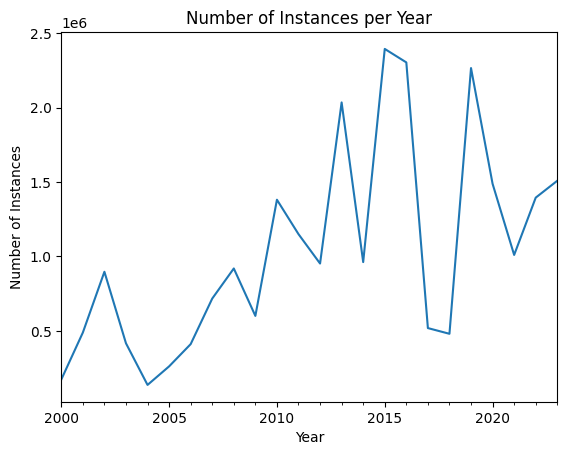

In [372]:
# Resample the data by year and count the number of instances per year
df_yearly = df.resample('YE').size()

# Plot the time series
df_yearly.plot(kind='line', title='Number of Instances per Year', xlabel='Year', ylabel='Number of Instances')
plt.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_27104\2841668055.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').size()


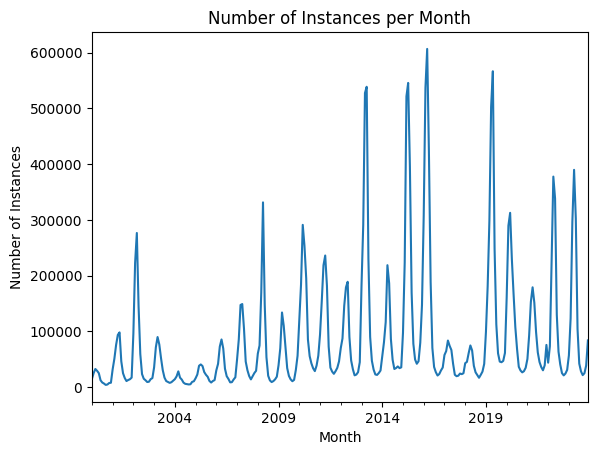

In [373]:
# Resample the data by month and count the number of instances per month
df_monthly = df.resample('M').size()

# Plot the time series
df_monthly.plot(kind='line', title='Number of Instances per Month', xlabel='Month', ylabel='Number of Instances')
plt.show()

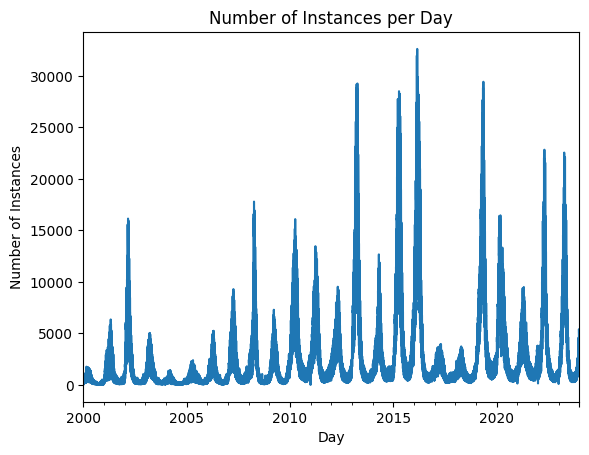

In [374]:
# Resample the data by day and count the number of instances per day
df_daily = df.resample('D').size()

# Plot the time series
df_daily.plot(kind='line', title='Number of Instances per Day', xlabel='Day', ylabel='Number of Instances')
plt.show()

# Chikungunya

In [391]:
df = pd.read_csv('../bases/bases_usadas/chik.csv', encoding='latin1')
df.columns

C:\Users\angel\AppData\Local\Temp\ipykernel_27104\3722975156.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../bases/bases_usadas/chik.csv', encoding='latin1')


Index(['DT_NOTIFIC', 'CS_SEXO', 'NU_IDADE_N', 'SG_UF_NOT', 'CS_RACA'], dtype='object')

In [392]:
df.rename(columns={
    'DT_NOTIFIC': 'data',
    'CS_SEXO': 'sexo',
    'NU_IDADE_N': 'idade',
    'CS_RACA': 'raca',
    'SG_UF_NOT': 'estado'
}, inplace=True)

df.columns

Index(['data', 'sexo', 'idade', 'estado', 'raca'], dtype='object')

In [393]:
df['raca'].unique()

array([4.0, 2.0, 9.0, 1.0, nan, 3.0, 5.0, '1', '4', '9', '2', '3', '5',
       'H', 'ô'], dtype=object)

In [394]:
df['raca'] = df['raca'].fillna(0).replace([9, '9', 'H', 'ô'], 0).astype(np.int64)
df['raca'].unique()

array([4, 2, 0, 1, 3, 5])

In [395]:
df['sexo'].unique()

array(['F', 'M', 'I', nan, 'Ú', 'm'], dtype=object)

In [396]:
df['sexo'] = df['sexo'].fillna(0).replace(['I', 'Ú', 'm'], 0).replace({'F': '2', 'M': '1'}).astype(np.int64)
df['sexo'].unique()

array([2, 1, 0])

In [397]:
df['estado'].unique()

array([28, 24, 26, 29, 21, 16, 14, 53, 50, 42, 35, 33, 51, 15, 27, 23, 52,
       41, 11, 13, 17, 22, 31, 43, 25, 12, 32])

In [398]:
unique_idades = df['idade'].unique().tolist()
print(unique_idades)

[4027, 4050, 4012, 4041, 4052, 4058, 4042, 4045, 4046, 4010, 4006, 4037, 4051, 4020, 4022, 4011, 4009, 4055, 4048, 4060, 4033, 4038, 4019, 4001, 4056, 4035, 4032, 4049, 4075, 4025, 4016, 4024, 4039, 4065, 4054, 4053, 4018, 4034, 4005, 4072, 4066, 4014, 4043, 4023, 4082, 4044, 4021, 4040, 4057, 4061, 4013, 4004, 4017, 4026, 4002, 4059, 3006, 4047, 4030, 4073, 4036, 4029, 4007, 4064, 4031, 4067, 4070, 2014, 4063, 4071, 4015, 4069, 4008, 4078, 4028, 3005, 4077, 2001, 4080, 2000, 4074, 4062, 4084, 2019, 4083, 4085, 4076, 4079, 4003, 4068, 3011, 4095, 4086, 3004, 3008, 3007, 3001, 4081, 4087, 3002, 4088, 4098, 3010, 2004, 4094, 3009, 4089, 2025, 4091, 3003, 2009, 2003, 2005, 2024, 2002, 4096, 2028, 2008, 4092, 2007, 2022, 4093, 4109, 4090, 2027, 2020, 2013, 2010, 4111, 4107, 2012, 2011, 2006, 2021, 4099, 4106, 2016, 4097, 2026, 4101, 2023, 2015, 2018, 2017, 2057, 4102, 4100, 4104, 4103, 2029, 0, 57, 6, 1029, 4115, 4000, 4108, 2030, 4116, 4402, 3038, 1020, 4403, 44, 4105, 59, 1019, 30, 4112,

In [399]:
# Replace NaN values with 30
df['idade'] = df['idade'].replace(np.nan, 30)

def remove_first_char(x):
    if isinstance(x, int):
        
        if x < 4000: ## Less than one year old
            return str(0)

        x = str(x)

    if isinstance(x, str) and len(x) >= 4:
        x = x[1:]
        if x[0].isalpha():
            x = x[1:]

    return x

# Remove the first character if the string has more than 4 characters
df['idade'] = df['idade'].apply(remove_first_char)

# Convert all values to np.int64
df['idade'] = df['idade'].astype(np.int64)

# Set values greater than 120 to 0
df['idade'] = df['idade'].apply(lambda x: 0 if x > 130 else x)

# Display the unique values to verify the transformation
df['idade'].unique()

array([ 27,  50,  12,  41,  52,  58,  42,  45,  46,  10,   6,  37,  51,
        20,  22,  11,   9,  55,  48,  60,  33,  38,  19,   1,  56,  35,
        32,  49,  75,  25,  16,  24,  39,  65,  54,  53,  18,  34,   5,
        72,  66,  14,  43,  23,  82,  44,  21,  40,  57,  61,  13,   4,
        17,  26,   2,  59,   0,  47,  30,  73,  36,  29,   7,  64,  31,
        67,  70,  63,  71,  15,  69,   8,  78,  28,  77,  80,  74,  62,
        84,  83,  85,  76,  79,   3,  68,  95,  86,  81,  87,  88,  98,
        94,  89,  91,  96,  92,  93, 109,  90, 111, 107,  99, 106,  97,
       101, 102, 100, 104, 103, 115, 108, 116, 105, 112, 110, 117, 120,
       119, 113, 114, 122, 123, 118])

In [400]:
# Convert 'data' column to datetime, coerce errors to NaT
df['data'] = pd.to_datetime(df['data'], format='%Y%m%d', errors='coerce')

# Remove rows with NaT in 'data' column
df = df.dropna(subset=['data'])

# Set 'data' column as index
df.set_index('data', inplace=True)

# Display few rows to verify
df

,sexo,idade,estado,raca
data,,,,
2015-01-01,2,27,28,4
2015-01-01,2,50,24,4
2015-01-01,1,12,26,2
2015-01-01,2,41,29,0
2015-01-01,2,27,29,1
...,...,...,...,...
2023-03-26,1,0,17,4
2023-03-27,2,71,17,4
2023-03-27,1,43,17,4


In [401]:
memory_usage = df.memory_usage(deep=True).sum()
print(f"Memory usage of df: {memory_usage / (1024 ** 2):.2f} MB")

Memory usage of df: 63.63 MB


In [402]:
df.to_parquet('CHIK.parquet')

# Zika

In [403]:
df = pd.read_csv('../bases/bases_usadas/zika.csv')
df

,CS_SEXO,CS_RACA,DT_NOTIFIC,NU_IDADE_N,SG_UF_NOT
0,M,NaN,20160101,4116,17
1,M,4.0,20160101,4048,29
2,M,4.0,20160101,4002,29
3,F,1.0,20160101,4077,29
4,M,9.0,20160101,4023,32
...,...,...,...,...,...
463024,M,4.0,20231031,4017,15
463025,F,4.0,20231031,3009,43
463026,F,4.0,20231031,4014,12
463027,F,4.0,20231031,4014,12


In [404]:
df.rename(columns={
    'DT_NOTIFIC': 'data',
    'CS_SEXO': 'sexo',
    'NU_IDADE_N': 'idade',
    'CS_RACA': 'raca',
    'SG_UF_NOT': 'estado'
}, inplace=True)

df.columns

Index(['sexo', 'raca', 'data', 'idade', 'estado'], dtype='object')

In [405]:
df['raca'].unique()

array([nan,  4.,  1.,  9.,  2.,  3.,  5.])

In [406]:
df['raca'] = df['raca'].fillna(0).replace(9, 0).astype(np.int64)
df['raca'].unique()

array([0, 4, 1, 2, 3, 5])

In [407]:
df['sexo'].unique()

array(['M', 'F', 'I'], dtype=object)

In [408]:
df['sexo'] = df['sexo'].fillna(0).replace('I', 0).replace({'F': '2', 'M': '1'}).astype(np.int64)
df['sexo'].unique()

array([1, 2, 0])

In [409]:
df['estado'].unique()

array([17, 29, 32, 15, 25, 41, 33, 31, 26, 24, 42, 35, 51, 23, 50, 28, 27,
       13, 52, 12, 11, 21, 53, 43, 16, 22, 14])

In [410]:
unique_idades = df['idade'].unique().tolist()
print(unique_idades)

[4116, 4048, 4002, 4077, 4023, 4033, 4026, 4054, 4050, 4029, 3002, 3011, 4008, 4022, 4046, 4037, 4039, 4021, 4006, 4009, 4078, 4004, 4010, 4011, 4028, 4035, 4032, 4038, 4018, 4042, 4017, 4013, 4061, 4056, 4001, 4044, 4059, 4068, 4024, 4030, 4064, 4019, 4051, 4045, 4060, 4020, 4047, 4043, 4031, 4055, 4036, 4015, 4034, 4040, 4005, 4058, 4052, 4012, 4062, 4065, 4063, 4007, 4049, 3009, 4067, 4025, 4027, 4003, 3010, 4041, 4016, 4057, 4071, 4053, 4014, 2000, 4079, 4069, 4066, 4075, 2009, 3007, 3006, 4082, 4083, 4095, 4070, 4074, 2007, 4086, 4072, 4080, 4087, 4081, 3005, 3003, 4073, 2005, 3004, 3001, 4093, 4084, 3008, 4085, 4076, 4091, 2017, 2015, 4100, 4088, 2002, 2024, 4099, 2001, 2004, 2020, 4089, 4090, 4094, 4120, 3029, 4103, 2008, 2006, 2003, 2018, 2013, 2021, 4092, 2016, 2014, 4096, 2010, 4108, 2022, 4101, 2012, 2026, 2025, 4110, 4098, 2019, 1014, 2027, 1001, 4097, 2029, 4000, 2011, 4109, 4102, 2023, 2028, 4113, 4107, 2030, 3076, 4114, 3028, 4104, 4105, 1021, 3042, 3040, 4115, 3053, 411

In [411]:
# Replace NaN values with 30
df['idade'] = df['idade'].replace(np.nan, 30)

def remove_first_char(x):
    if isinstance(x, int):
        
        if x < 4000: ## Less than one year old
            return str(0)

        x = str(x)

    if isinstance(x, str) and len(x) >= 4:
        x = x[1:]
        if x[0].isalpha():
            x = x[1:]

    return x

# Remove the first character if the string has more than 4 characters
df['idade'] = df['idade'].apply(remove_first_char)

# Convert all values to np.int64
df['idade'] = df['idade'].astype(np.int64)

# Set values greater than 120 to 0
df['idade'] = df['idade'].apply(lambda x: 0 if x > 130 else x)

# Display the unique values to verify the transformation
df['idade'].unique()

array([116,  48,   2,  77,  23,  33,  26,  54,  50,  29,   0,   8,  22,
        46,  37,  39,  21,   6,   9,  78,   4,  10,  11,  28,  35,  32,
        38,  18,  42,  17,  13,  61,  56,   1,  44,  59,  68,  24,  30,
        64,  19,  51,  45,  60,  20,  47,  43,  31,  55,  36,  15,  34,
        40,   5,  58,  52,  12,  62,  65,  63,   7,  49,  67,  25,  27,
         3,  41,  16,  57,  71,  53,  14,  79,  69,  66,  75,  82,  83,
        95,  70,  74,  86,  72,  80,  87,  81,  73,  93,  84,  85,  76,
        91, 100,  88,  99,  89,  90,  94, 120, 103,  92,  96, 108, 101,
       110,  98,  97, 109, 102, 113, 107, 114, 104, 105, 115, 117, 118,
       106, 111])

In [412]:
# Convert 'data' column to datetime, coerce errors to NaT
df['data'] = pd.to_datetime(df['data'], format='%Y%m%d', errors='coerce')

# Remove rows with NaT in 'data' column
df = df.dropna(subset=['data'])

# Set 'data' column as index
df.set_index('data', inplace=True)

# Display few rows to verify
df

,sexo,raca,idade,estado
data,,,,
2016-01-01,1,0,116,17
2016-01-01,1,4,48,29
2016-01-01,1,4,2,29
2016-01-01,2,1,77,29
2016-01-01,1,0,23,32
...,...,...,...,...
2023-10-31,1,4,17,15
2023-10-31,2,4,0,43
2023-10-31,2,4,14,12


In [413]:
df.to_parquet('ZIKA.parquet')

# SIM

In [459]:
df = pd.read_csv('../bases/bases_usadas/sim.csv')
df

,IDADE,SEXO,RACACOR,DTOBITO,CODMUNRES,CAUSABAS
0,425.0,1.0,NaN,11021996,1200000,V892
1,430.0,1.0,NaN,4061996,1200401,I219
2,443.0,2.0,NaN,20021996,1200401,X999
3,423.0,2.0,NaN,1011996,1200401,O984
4,421.0,2.0,NaN,1011996,1200401,X959
...,...,...,...,...,...,...
85989,419.0,2.0,5.0,16112022,120034,R99
85990,482.0,2.0,5.0,2112022,120060,J960
85991,487.0,2.0,5.0,20072022,120060,A09
85992,426.0,2.0,5.0,8092022,120060,A153


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85994 entries, 0 to 85993
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADE      85939 non-null  float64
 1   SEXO       85992 non-null  float64
 2   RACACOR    69464 non-null  float64
 3   DTOBITO    85994 non-null  int64  
 4   CODMUNRES  85994 non-null  int64  
 5   CAUSABAS   85994 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 3.9+ MB


In [461]:
df.rename(columns={
    'IDADE': 'idade',
    'SEXO': 'sexo',
    'RACACOR': 'raca',
    'CODMUNRES': 'estado',
    'DTOBITO': 'data',
    'CAUSABAS': 'causa'
}, inplace=True)

df.columns

Index(['idade', 'sexo', 'raca', 'data', 'estado', 'causa'], dtype='object')

In [462]:
idades = df['idade'].unique()

In [463]:
isinstance( idades[0] , float)
int(idades[0])

425

In [464]:
# Replace NaN values with 30
df['idade'] = df['idade'].replace(np.nan, 30)

In [465]:
df

,idade,sexo,raca,data,estado,causa
0,425.0,1.0,NaN,11021996,1200000,V892
1,430.0,1.0,NaN,4061996,1200401,I219
2,443.0,2.0,NaN,20021996,1200401,X999
3,423.0,2.0,NaN,1011996,1200401,O984
4,421.0,2.0,NaN,1011996,1200401,X959
...,...,...,...,...,...,...
85989,419.0,2.0,5.0,16112022,120034,R99
85990,482.0,2.0,5.0,2112022,120060,J960
85991,487.0,2.0,5.0,20072022,120060,A09
85992,426.0,2.0,5.0,8092022,120060,A153


In [466]:
def remove_first_number(x):

    if isinstance(x, float):
        x = int(x)

    if isinstance(x, int):
    
        if x < 400: ## Less than one year old
            return str(0)
        
        if x >= 400 and x < 500:
            return str(x - 400)
        
        if x >= 500 and x < 600:
            return str((x-500) + 100)

        if x >= 600:
            return str(0)



# Remove the first number
df['idade'] = df['idade'].apply(remove_first_number)

# Convert all values to np.int64
df['idade'] = df['idade'].astype(np.int64)

# Display the unique values to verify the transformation
df['idade'].unique()

array([ 25,  30,  43,  23,  21,  36,   0,  87,  70,  65,  55,  72,  62,
        91,  75,   1,  51,  78,  88,  10,  42,  85,  76,  41,  50,  40,
        67,  58,  73,  48,  32,  38,  84,  77,  45,  60,  44,  68,  56,
        71,  81,  17,  52,  57,   5,  66,  13,  28,  22,  86,  64,  49,
        29,   2,  47,  19,   6,  27,  89,  24,  79,  53,   3,  14,  90,
        83,  74,  37,  18,  61,  15,  80,  39,  63,  31,  59,  16,  46,
        33,  20,  54,  82,  35,  94,  12,  69,   4,  26,  11,   8,  34,
         9, 101,  93,  98,   7,  92, 106,  95, 111,  96,  97,  99, 108,
       102, 103, 100, 104, 105, 107, 109, 112, 110, 131, 113])

In [467]:
df['sexo'].unique()

array([ 1.,  2., nan,  0.])

In [468]:
df['sexo'] = df['sexo'].fillna(0).astype(np.int64)
df

,idade,sexo,raca,data,estado,causa
0,25,1,NaN,11021996,1200000,V892
1,30,1,NaN,4061996,1200401,I219
2,43,2,NaN,20021996,1200401,X999
3,23,2,NaN,1011996,1200401,O984
4,21,2,NaN,1011996,1200401,X959
...,...,...,...,...,...,...
85989,19,2,5.0,16112022,120034,R99
85990,82,2,5.0,2112022,120060,J960
85991,87,2,5.0,20072022,120060,A09
85992,26,2,5.0,8092022,120060,A153


In [469]:
df['raca'].unique()

array([nan,  3.,  1.,  4.,  2.,  5.])

In [470]:
df['raca'] = df['raca'].fillna(0).astype(np.int64)
df

,idade,sexo,raca,data,estado,causa
0,25,1,0,11021996,1200000,V892
1,30,1,0,4061996,1200401,I219
2,43,2,0,20021996,1200401,X999
3,23,2,0,1011996,1200401,O984
4,21,2,0,1011996,1200401,X959
...,...,...,...,...,...,...
85989,19,2,5,16112022,120034,R99
85990,82,2,5,2112022,120060,J960
85991,87,2,5,20072022,120060,A09
85992,26,2,5,8092022,120060,A153


In [471]:
df['estado'].unique()

array([1200000, 1200401, 1200385, 1200203, 1200104, 1200138, 1200708,
       1200302, 1200500, 1200427, 1200336, 1200609, 1200450, 1200054,
       1200252, 1200344, 1200807, 1200013, 1200393, 1200179, 1200351,
       1200328, 1200435,  120033,  120042,  120020,  120043,  120030,
        120035,  120034,  120040,  120039,  120060,  120045,  120070,
        120017,  120050,  120038,  120010,  120005,  120001,  120080,
        120032,  120025,  120000,  120013])

In [472]:
df['causa'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 85994 entries, 0 to 85993
Series name: causa
Non-Null Count  Dtype 
--------------  ----- 
85994 non-null  object
dtypes: object(1)
memory usage: 672.0+ KB


In [473]:
df['data'] = df['data'].astype(str).str.zfill(8)
df

,idade,sexo,raca,data,estado,causa
0,25,1,0,11021996,1200000,V892
1,30,1,0,04061996,1200401,I219
2,43,2,0,20021996,1200401,X999
3,23,2,0,01011996,1200401,O984
4,21,2,0,01011996,1200401,X959
...,...,...,...,...,...,...
85989,19,2,5,16112022,120034,R99
85990,82,2,5,02112022,120060,J960
85991,87,2,5,20072022,120060,A09
85992,26,2,5,08092022,120060,A153


In [474]:
# Convert 'data' column to datetime, coerce errors to NaT
df['data'] = pd.to_datetime(df['data'], format='%d%m%Y', errors='coerce')

# Remove rows with NaT in 'data' column
df = df.dropna(subset=['data'])

# Set 'data' column as index
df.set_index('data', inplace=True)

# Display few rows to verify
df

,idade,sexo,raca,estado,causa
data,,,,,
1996-02-11,25,1,0,1200000,V892
1996-06-04,30,1,0,1200401,I219
1996-02-20,43,2,0,1200401,X999
1996-01-01,23,2,0,1200401,O984
1996-01-01,21,2,0,1200401,X959
...,...,...,...,...,...
2022-11-16,19,2,5,120034,R99
2022-11-02,82,2,5,120060,J960
2022-07-20,87,2,5,120060,A09


In [475]:
df.drop(columns=['estado'], inplace=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_27104\45816211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['estado'], inplace=True)


In [477]:
df.to_parquet('SIM.parquet')

# SIH

In [495]:
df = pd.read_csv('../bases/bases_usadas/sih.csv')
df

,IDADE,SEXO,MORTE,DT_INTER,RACA_COR,US_TOT
0,82,3,0,20071207,1,86.13
1,25,3,0,20071208,3,239.26
2,19,3,0,20080106,3,363.41
3,16,3,0,20071218,3,373.00
4,16,3,0,20071225,3,363.41
...,...,...,...,...,...,...
817961,32,1,0,20240618,3,180.00
817962,18,1,0,20240618,5,37.47
817963,17,3,0,20240603,3,99.45
817964,44,1,0,20240625,3,41.19


In [496]:
df.rename(columns={
    'IDADE': 'idade',
    'SEXO': 'sexo',
    'MORTE': 'morte',
    'DT_INTER': 'data',
    'RACA_COR': 'raca',
    'US_TOT': 'dolar_gasto'
}, inplace=True)

df.columns

Index(['idade', 'sexo', 'morte', 'data', 'raca', 'dolar_gasto'], dtype='object')

In [497]:
df['idade'].unique()    

array([82, 25, 19, 16, 15, 21, 31, 30, 32, 36, 22, 48, 18, 27, 24, 23, 28,
       40, 62, 38, 39, 67, 86, 76, 20,  1, 10,  2,  4, 35, 65, 53, 44,  0,
       42, 34,  3, 33, 17, 26, 14, 29, 54,  8, 51, 37, 57, 47, 59, 74, 43,
       77, 55,  9, 46, 45,  7, 12,  6, 68, 75, 97, 70, 80, 66, 11, 49, 69,
        5, 41, 58, 71, 72, 78, 56, 50, 13, 73, 63, 79, 52, 89, 60, 61, 64,
       81, 85, 87, 93, 83, 84, 88, 90, 92, 96, 98, 91, 94, 95, 99])

In [498]:
df['sexo'].unique()

array([3, 1])

In [499]:
df['sexo'] = df['sexo'].fillna(0).replace(3, 2)
df['sexo'].unique()

array([2, 1])

In [500]:
df['morte'].unique()

array([0, 1])

In [501]:
df['raca'].unique()

array([ 1,  3,  2,  4,  5, 99])

In [502]:
df['raca'] = df['raca'].replace(99, 0)
df['raca'].unique()

array([1, 3, 2, 4, 5, 0])

In [503]:
df['dolar_gasto'].unique()

array([  86.13,  239.26,  363.41, ..., 1333.35, 2612.3 ,    8.87])

In [504]:
df['dolar_gasto'] = df['dolar_gasto'].fillna(df['dolar_gasto'].mean())
df

,idade,sexo,morte,data,raca,dolar_gasto
0,82,2,0,20071207,1,86.13
1,25,2,0,20071208,3,239.26
2,19,2,0,20080106,3,363.41
3,16,2,0,20071218,3,373.00
4,16,2,0,20071225,3,363.41
...,...,...,...,...,...,...
817961,32,1,0,20240618,3,180.00
817962,18,1,0,20240618,5,37.47
817963,17,2,0,20240603,3,99.45
817964,44,1,0,20240625,3,41.19


In [505]:
# Convert 'data' column to datetime, coerce errors to NaT
df['data'] = pd.to_datetime(df['data'], format='%Y%m%d', errors='coerce')

# Remove rows with NaT in 'data' column
df = df.dropna(subset=['data'])

# Set 'data' column as index
df.set_index('data', inplace=True)

# Display few rows to verify
df

,idade,sexo,morte,raca,dolar_gasto
data,,,,,
2007-12-07,82,2,0,1,86.13
2007-12-08,25,2,0,3,239.26
2008-01-06,19,2,0,3,363.41
2007-12-18,16,2,0,3,373.00
2007-12-25,16,2,0,3,363.41
...,...,...,...,...,...
2024-06-18,32,1,0,3,180.00
2024-06-18,18,1,0,5,37.47
2024-06-03,17,2,0,3,99.45


In [506]:
df.to_parquet('SIH.parquet')